In [127]:
import pandas as pd
import numpy as np

nameslocs = {"Normalizer":"scripts\\new_results\\Normalizer Timings.txt",
             "MaxAbs Scaler":"scripts\\new_results\\MaxAbs Scaler Timings.txt",
             "MinMax Scaler":"scripts\\new_results\\MinMax Scaler Timings.txt",
             "Quantile Transformer":"scripts\\new_results\\Quantile Transformer Timings.txt",
             "Robust Scaler":"scripts\\new_results\\Robust Scaler Timings.txt",
             "Standard Scaler":"scripts\\new_results\\Standard Scaler Timings.txt",
             "Unnormalized":"scripts\\new_results\\Unnormalized Timings.txt"}
values = []

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
scalerTimings = {}

In [130]:
for name in nameslocs.keys():
    with open(nameslocs[name], "r") as file:
        item_list = file.readlines()
        item_string = ''
        for item in item_list:
            item_string += item

        item_list = item_string.split("\n")
        number_list = []
        item_list.remove('')
        for item in item_list:
            number_list.append(float(item))
        print(number_list)
        print(pd.Series(number_list))
        scalerTimings[name] = pd.Series(number_list)

[9.873512828010135, 9.912109831990673, 8.290905072002206, 8.530833551990801, 7.81091696800897, 7.824256548001432, 7.642130351976957, 9.18565519199241, 7.736516443970612, 8.658578740013764]
0    9.873513
1    9.912110
2    8.290905
3    8.530834
4    7.810917
5    7.824257
6    7.642130
7    9.185655
8    7.736516
9    8.658579
dtype: float64
[6.841506260007154, 6.276364963988308, 5.211644531995989, 5.516692444004584, 5.051232380005532, 4.919319627997465, 5.05762628400931, 4.9128468359960245, 4.948569919997826, 5.975698960002046]
0    6.841506
1    6.276365
2    5.211645
3    5.516692
4    5.051232
5    4.919320
6    5.057626
7    4.912847
8    4.948570
9    5.975699
dtype: float64
[5.602360892002471, 5.809208643995225, 4.985501344001386, 6.405696616012137, 4.832947032004595, 4.6665429679933, 4.773799844007008, 4.691874588003848, 4.7592199559952135, 5.823954119998962]
0    5.602361
1    5.809209
2    4.985501
3    6.405697
4    4.832947
5    4.666543
6    4.773800
7    4.691875
8    4.7

In [131]:
scalerTimings = pd.DataFrame(scalerTimings)

In [132]:
scalerTimings

,Normalizer,MaxAbs Scaler,MinMax Scaler,Quantile Transformer,Robust Scaler,Standard Scaler,Unnormalized
0,9.873513,6.841506,5.602361,5.677126,8.441426,5.081480,45.793781
1,9.912110,6.276365,5.809209,5.221060,7.371751,5.267023,41.623820
2,8.290905,5.211645,4.985501,5.085309,6.933766,5.435618,41.538639
3,8.530834,5.516692,6.405697,4.816177,7.058420,4.863715,39.144826
4,7.810917,5.051232,4.832947,4.371411,6.598724,4.563822,34.353703
5,7.824257,4.919320,4.666543,5.332835,6.450098,4.565296,37.856988
6,7.642130,5.057626,4.773800,4.421493,6.508388,4.564864,34.297019
7,9.185655,4.912847,4.691875,4.617476,6.421926,4.430396,36.738637
8,7.736516,4.948570,4.759220,5.193569,7.900911,4.527429,34.573946
9,8.658579,5.975699,5.823954,4.633436,6.303741,5.462391,44.996552


In [133]:
for i in scalerTimings.columns:
    print(i)

Normalizer
MaxAbs Scaler
MinMax Scaler
Quantile Transformer
Robust Scaler
Standard Scaler
Unnormalized


In [134]:
shorter = { "Normalizer":"N",
            "MaxAbs Scaler":"MAS",
            "MinMax Scaler":"MMS",
            "Quantile Transformer":"QT",
            "Robust Scaler":"RS",
            "Standard Scaler":"SS",
            "Unnormalized":"UN"
            }

scalerTimings.rename(shorter, axis = 1, inplace = True)

In [135]:
scalerTimingsMelt = scalerTimings.melt()
scalerTimingsMelt.rename({"variable":"Scaling Algorithm", "value":"Training time / sec"}, axis = 1, inplace = True)

Text(0.5, 1.0, 'Training time for scaling algorithms')

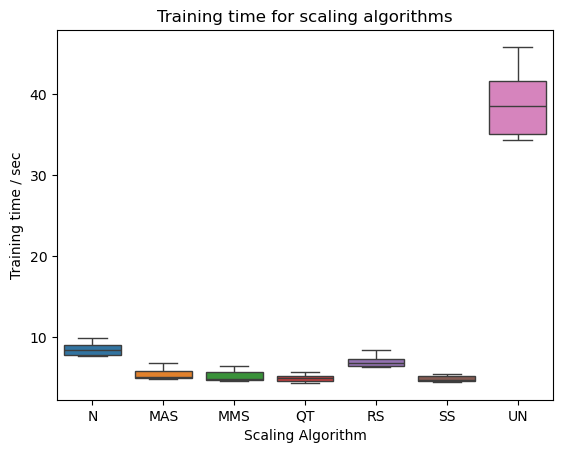

In [136]:
sns.boxplot(data = scalerTimingsMelt, x = 'Scaling Algorithm', y = 'Training time / sec', hue = 'Scaling Algorithm')
plt.title("Training time for scaling algorithms")

In [137]:
normalizedScalerTimings = scalerTimings.drop('UN', axis = 1)
normalizedScalerTimings

,N,MAS,MMS,QT,RS,SS
0,9.873513,6.841506,5.602361,5.677126,8.441426,5.081480
1,9.912110,6.276365,5.809209,5.221060,7.371751,5.267023
2,8.290905,5.211645,4.985501,5.085309,6.933766,5.435618
3,8.530834,5.516692,6.405697,4.816177,7.058420,4.863715
4,7.810917,5.051232,4.832947,4.371411,6.598724,4.563822
5,7.824257,4.919320,4.666543,5.332835,6.450098,4.565296
6,7.642130,5.057626,4.773800,4.421493,6.508388,4.564864
7,9.185655,4.912847,4.691875,4.617476,6.421926,4.430396
8,7.736516,4.948570,4.759220,5.193569,7.900911,4.527429
9,8.658579,5.975699,5.823954,4.633436,6.303741,5.462391


In [138]:
normalizedScalerTimingsMelt = normalizedScalerTimings.melt()
normalizedScalerTimingsMelt.rename({"variable":"Scaling Algorithm", "value":"Training time / sec"}, axis = 1, inplace = True)

Text(0.5, 1.0, 'Training time for scaling algorithms')

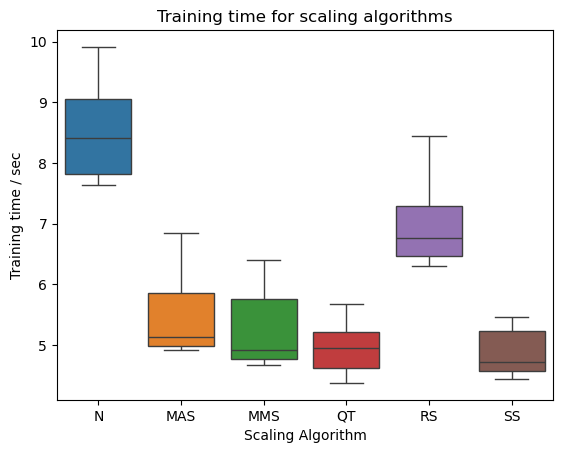

In [139]:
sns.boxplot(data = normalizedScalerTimingsMelt, x = 'Scaling Algorithm', y = 'Training time / sec', hue = 'Scaling Algorithm')
plt.title("Training time for scaling algorithms")

In [140]:
summaryStats = {"median":scalerTimings.median(),"std":scalerTimings.std()}

In [141]:
summaryStats = pd.DataFrame(summaryStats)
summaryStats

,median,std
N,8.410869,0.859534
MAS,5.134635,0.673867
MMS,4.909224,0.620319
QT,4.950743,0.430435
RS,6.766245,0.711757
SS,4.714505,0.403204
UN,38.500907,4.282993


In [142]:
summaryStats.T

,N,MAS,MMS,QT,RS,SS,UN
median,8.410869,5.134635,4.909224,4.950743,6.766245,4.714505,38.500907
std,0.859534,0.673867,0.620319,0.430435,0.711757,0.403204,4.282993


In [143]:
temp = summaryStats.drop('std', axis = 1)
medianTimes = pd.DataFrame()
medianTimes['Scaling Algorithm'] = temp.index
medianTimes['Median training time'] = temp.values

In [144]:
medianTimes

,Scaling Algorithm,Median training time
0,N,8.410869
1,MAS,5.134635
2,MMS,4.909224
3,QT,4.950743
4,RS,6.766245
5,SS,4.714505
6,UN,38.500907


<Axes: xlabel='Scaling Algorithm', ylabel='Median training time'>

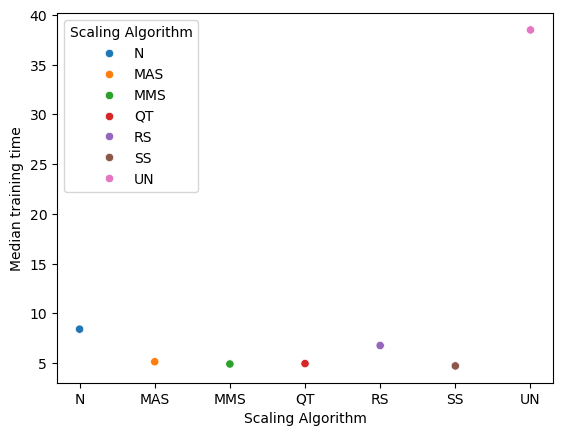

In [146]:
sns.scatterplot(data = medianTimes, x = 'Scaling Algorithm', y = 'Median training time', hue = 'Scaling Algorithm', marker = 'o')